In [1]:
# https://stat.columbia.edu/~rachel/datasets/
# https://stat.columbia.edu/~rachel/datasets/csv1.csv

In [3]:
import dask
import numpy as np
import numpy.typing as npt
from typing import *
import pandas as pd
import dask.dataframe as dd


In [26]:
url = "https://stat.columbia.edu/~rachel/datasets/nyt0.csv"
#tag::ex_load_1kb[]
df = dd.read_csv(url)

In [6]:
df.info

<bound method DataFrame.info of Dask DataFrame Structure:
                 Age gender n.impressions n.clicks
npartitions=1                                     
               int64  int64         int64    int64
                 ...    ...           ...      ...
Dask Name: read-csv, 1 tasks>

In [7]:
df.head()

,Age,gender,n.impressions,n.clicks
0,48,1,5,0
1,64,0,3,0
2,56,1,6,0
3,33,0,5,0
4,31,0,7,0


In [35]:
df.dtypes

Age              int64
gender           int64
n.impressions    int64
n.clicks         int64
dtype: object

In [ ]:
# mayby dropna

In [14]:
# df.compute()

,Age,gender,n.impressions,n.clicks
0,48,1,5,0
1,64,0,3,0
2,56,1,6,0
3,33,0,5,0
4,31,0,7,0
...,...,...,...,...
499995,0,0,7,0
499996,0,0,4,0
499997,0,0,6,0
499998,0,0,8,0


In [36]:
# Split the dataframe by the 'adult' column

adult_df = df[df["Age"] >= 19]
minors_df = df[df["Age"] < 19]

In [37]:
adult_df.compute()

,Age,gender,n.impressions,n.clicks
0,48,1,5,0
1,64,0,3,0
2,56,1,6,0
3,33,0,5,0
4,31,0,7,0
...,...,...,...,...
499990,72,0,2,0
499992,79,0,6,0
499993,33,1,2,1
499994,46,0,3,0


In [39]:
b_df = adult_df.categorize(columns=['Age'])

In [40]:
b_df.compute()

,Age,gender,n.impressions,n.clicks
0,48,1,5,0
1,64,0,3,0
2,56,1,6,0
3,33,0,5,0
4,31,0,7,0
...,...,...,...,...
499990,72,0,2,0
499992,79,0,6,0
499993,33,1,2,1
499994,46,0,3,0


In [22]:
df2 = df.categorize(
    columns=["Age"],
    split_every=10
)
df2.compute()

,Age,gender,n.impressions,n.clicks
0,48,1,5,0
1,64,0,3,0
2,56,1,6,0
3,33,0,5,0
4,31,0,7,0
...,...,...,...,...
499995,0,0,7,0
499996,0,0,4,0
499997,0,0,6,0
499998,0,0,8,0


In [10]:
df.categorize(
    x=df["Age"],
    bins=[0, 18, 24, 34, 44, 54, 64, np.inf]
)

AttributeError: 'DataFrame' object has no attribute 'cut'

Machine Learning with Dask

In [19]:
# !pip install scikeras>=0.1.8
# !pip install tensorflow>=2.3.0
# !pip install -U skorch
# !pip install torch
# !pip install torchvision
# !pip install pytorch-cpu #not sure if i need to fix this
!pip install s3fs

     |████████████████████████████████| 104 kB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 140 kB 34.1 MB/s eta 0:00:01
     |████████████████████████████████| 8.6 MB 36.2 MB/s eta 0:00:01
  Created wheel for aiobotocore: filename=aiobotocore-2.3.2-py3-none-any.whl size=111119 sha256=39704c05bb9dfa76f274ea2501287e0c66f4de7e5427ac4a2fe31e992a520819
  Stored in directory: /Users/mk/Library/Caches/pip/wheels/b3/89/03/4112068c5e4c80632cecdea57bfe014a291683dfc153106efa
Successfully built aiobotocore
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2021.8.1
    Uninstalling fsspec-2021.8.1:
      Successfully uninstalled fsspec-2021.8.1


In [54]:
!pip install cloudpickle==2.1.0
!pip install dask==2022.05.0
!pip install distributed==2022.5.0
!pip install lz4==4.0.0
!pip install msgpack==1.0.3
!pip install toolz==0.11.2


setup cluster

In [1]:
import dask
# Dask multithreading is only suited for mostly non-Python code (like pandas, numpy, etc.)
#tag::threads[]
dask.config.set(scheduler='threads')
#end::threads[]
#tag::process[]
dask.config.set(scheduler='processes')
#end::process[]
#tag::dask_use_forkserver[]
dask.config.set({"multiprocessing.context": "forkserver", "scheduler": "processes"})
#end::dask_use_forkserver[]

In [2]:
!export

declare -x AUTOFEATURE="true autotest"
declare -x BASH_IT="/Users/mk/.bash_it"
declare -x BASH_IT_THEME="powerline-plain"
declare -x CLICOLOR="1"
declare -x COLORFGBG="7;0"
declare -x COLORTERM="truecolor"
declare -x COMMAND_MODE="unix2003"
declare -x CONDA_DEFAULT_ENV="base"
declare -x CONDA_EXE="/Users/mk/opt/anaconda3/bin/conda"
declare -x CONDA_PREFIX="/Users/mk/opt/anaconda3"
declare -x CONDA_PROMPT_MODIFIER="(base) "
declare -x CONDA_PYTHON_EXE="/Users/mk/opt/anaconda3/bin/python"
declare -x CONDA_SHLVL="1"
declare -x DISPLAY="/private/tmp/com.apple.launchd.xsupGmgNuJ/org.macosforge.xquartz:0"
declare -x GIT_HOSTING="git@git.domain.com"
declare -x GIT_PAGER="cat"
declare -x GREP_COLOR="1;33"
declare -x HISTCONTROL="ignorespace:erasedups"
declare -x HISTSIZE="5000"
declare -x HOME="/Users/mk"
declare -x IRC_CLIENT="irssi"
declare -x ITERM_PROFILE="Default"
declare -x ITERM_SESSION_ID="w0t1p0:7ADB6DA6-B945-40B7-9494-E24E6A053A5D"
declare -x JAVA_HOME="/Library/Java/JavaVirtualMachi

In [3]:
#tag::make_dask_k8s_client[]
import dask
from dask.distributed import Client
from dask_kubernetes import KubeCluster, make_pod_spec
# Use load balancer to make it externally available, for purely internal
# the default of "ClusterIP" is better.
dask.config.set({"kubernetes.scheduler-service-type": "LoadBalancer"})
worker_template = make_pod_spec(image='holdenk/dask:latest',
                         memory_limit='8G', memory_request='8G',
                         cpu_limit=1, cpu_request=1)
scheduler_template = make_pod_spec(image='holdenk/dask:latest',
                         memory_limit='4G', memory_request='4G',
                         cpu_limit=1, cpu_request=1)
cluster = KubeCluster(pod_template = worker_template, scheduler_pod_template = scheduler_template)
cluster.adapt()    # or create and destroy workers dynamically based on workload
from dask.distributed import Client
client = Client(cluster)
#end::make_dask_k8s_client[]

Creating scheduler pod on cluster. This may take some time.


2022-05-25 17:56:51,179 - distributed.deploy.adaptive - INFO - Adaptive scaling started: minimum=0 maximum=inf


In [42]:
client.close()

In [2]:
from dask.distributed import Client
# when working with clusters, specify cluster config, n_workers and worker_size
client = Client()

In [24]:
import pandas as pd
import glob
import toolz
import dask
import dask.array as da
import torch
from torchvision import transforms
from PIL import Image
import numpy as np
import torch.nn as nn
import torch.optim as optim # optimization algo (eg SGD, Adam)
import torch.nn.functional as F # non-linear activation fn (e.g. relu, softmin, softamx, logsigmoid)
from torchvision import datasets, transforms # convenience wrapper for datasets and model architectures, common image transformations
from torch.utils.data.sampler import SubsetRandomSampler #validation test split
import urllib.request
import zipfile

1. Extract: get fashion-mnist

In [4]:
# we use dask.delayed so that load and transform is lazily done in cluster
@dask.delayed
def transform(img):
    trn = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,),)
    ]) #normalize mean / std. given as tuples
    #we convert PIL image or numpy.ndarray [0,255] to torch.FloatTensor, (C,H,W) [0.0,1.0]
    return trn(img)

def transform_nonlazy(img):
    trn = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,),)
    ]) #normalize mean / std. given as tuples
    #we convert PIL image or numpy.ndarray [0,255] to torch.FloatTensor, (C,H,W) [0.0,1.0]
    return trn(img)

In [5]:
@dask.delayed
def load_fashionMNIST_trainset(transform):
    trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=True, transform = transform)
    return trainset

In [11]:
@dask.delayed
def load_fashionMNIST_testset(transform):
    testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=False, transform = transform)
    return testset

In [20]:
# import s3fs

In [23]:
# fs = s3fs.S3FileSystem(anon=True)

In [49]:
# # https://github.com/zalandoresearch/fashion-mnist
# URL_BASE = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com"
# CHECKSUMS = {
#         "train-images-idx3-ubyte.gz": "3aede38d61863908ad78613f6a32ed271626dd12800ba2636569512369268a84",
#         "train-labels-idx1-ubyte.gz": "a04f17134ac03560a47e3764e11b92fc97de4d1bfaf8ba1a3aa29af54cc90845",
#         "t10k-images-idx3-ubyte.gz": "346e55b948d973a97e58d2351dde16a484bd415d4595297633bb08f03db6a073",
#         "t10k-labels-idx1-ubyte.gz": "67da17c76eaffca5446c3361aaab5c3cd6d1c2608764d35dfb1850b086bf8dd5",
#     }

# prefix = "train" #if split == train, else "t10k"
# images_file = f"{prefix}-images-idx3-ubyte.gz"
# labels_file = f"{prefix}-labels-idx1-ubyte.gz"
# # http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/

In [27]:

@dask.delayed
def load(path, fs=__builtins__):
    with fs.open(path, 'rb') as f:
        img = Image.open(f)
        return img

# @dask.delayed
# def load_csv(path):
#     import pandas as pd
#     return pd.read_csv(path, sep=',')

In [28]:
# objs = [load_csv(x) for x in glob.glob("fashion_mnist/dataset/fashion-mnist_train.csv")]

In [32]:
objs = [load_fashionMNIST_trainset(transform)]

In [37]:
x = dask.compute(objs)

In [66]:
images = x[0][0].data

In [65]:
labels = x[0][0].train_labels

/var/folders/jn/54vtqbx5231b0w09shgckwv80000gn/T/ipykernel_21364/3994676020.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(4, 20/4, idx+1, xticks=[], yticks=[])


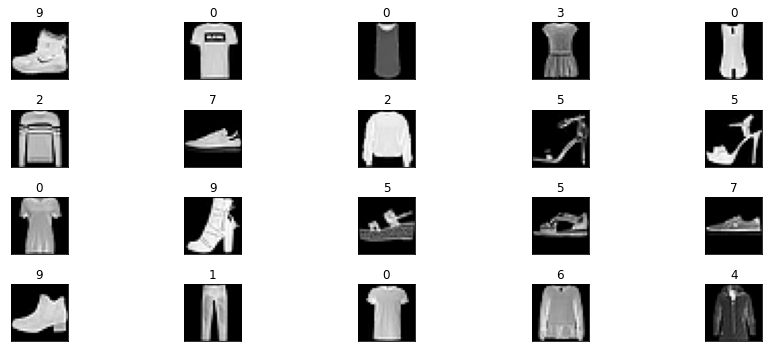

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15,5))
for idx in np.arange(20):
    ax = fig.add_subplot(4, 20/4, idx+1, xticks=[], yticks=[])
    ax. imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(labels[idx].item())
    fig.tight_layout()

In [33]:
tensors = [transform(x) for x in objs]

In [34]:
batches = [dask.delayed(torch.stack)(batch)
           for batch in toolz.partition_all(10, tensors)]


In [35]:
x = dask.compute(*batches)

2022-05-25 18:57:20,848 - distributed.worker - WARNING - Compute Failed
Key:       transform-7703ce37-5679-45dc-a854-3e675aef7e56
Function:  transform
args:      (Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /Users/mk/.pytorch/F_MNIST_data
    Split: Train
    StandardTransform
Transform: <function transform at 0x7fb3ef08cdc0>)
kwargs:    {}
Exception: 'TypeError("pic should be PIL Image or ndarray. Got <class \'torchvision.datasets.mnist.FashionMNIST\'>")'



TypeError: pic should be PIL Image or ndarray. Got <class 'torchvision.datasets.mnist.FashionMNIST'>

In [58]:
f = fs.open("s3://fashion-mnist.s3-website.eu-central-1.amazonaws.com" + "/train-images-idx3-ubyte.gz")

FileNotFoundError: The specified bucket does not exist

In [8]:
# whole_trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=True, transform = transform)
# trainset_len = 6000 #cheating a bit - we already know length
# indices = list(range(trainset_len))
# split = int(np.floor(0.2 * trainset_len))
# batch_size = 64
# num_workers = 4 #would get it from distributed client
# sampler = SubsetRandomSampler(indices[:split])

# train_loader = torch.utils.data.DataLoader(
#     whole_trainset, sampler=sampler, batch_size=batch_size, num_workers=num_workers
# )

In [15]:
loader = load_fashionMNIST_trainset(transform)

In [16]:
loaded = dask.compute(loader)

KilledWorker: ('transform-f0524820-fa1a-46d4-8abc-de33fb2ffcd5', <WorkerState 'tcp://10.42.9.18:38983', name: 0, status: closed, memory: 0, processing: 1>)

2022-05-25 18:03:31,064 - distributed.deploy.adaptive - INFO - Retiring workers [0]


In [48]:
# lazy load
# note we aren't using torch.utils.DataLoader
# whole_trainset = load_fashionMNIST_trainset(transform)
# whole_trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=True, transform = transform)

non-dask way

In [47]:
non_dask_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,),)
    ])
whole_trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=True, transform = non_dask_transform)

In [48]:
trainset_len = 6000 #cheating a bit - we already know length
indices = list(range(trainset_len))
split = int(np.floor(0.2 * trainset_len))
batch_size = 64
num_workers = 4 #would get it from distributed client
validation_sampler = SubsetRandomSampler(indices[:split])

In [49]:
train_loader = torch.utils.data.DataLoader(
    whole_trainset, sampler=validation_sampler, batch_size=batch_size, num_workers=num_workers
)

In [50]:
dataiter = iter(train_loader)

In [51]:
images, labels = dataiter.next()

In [53]:
labels

tensor([8, 0, 7, 8, 6, 9, 1, 7, 1, 9, 8, 2, 8, 1, 0, 5, 7, 9, 5, 8, 9, 7, 0, 4,
        7, 6, 4, 8, 1, 2, 2, 0, 2, 9, 6, 1, 6, 2, 8, 8, 0, 7, 4, 2, 4, 5, 7, 9,
        3, 8, 3, 7, 6, 4, 7, 4, 1, 8, 8, 5, 0, 0, 3, 4])

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15,5))
for idx in np.arange(20):
    ax = fig.add_subplot(4, 20/4, idx+1, xticks=[], yticks=[])
    ax. imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(labels[idx].item())
    fig.tight_layout()